In [165]:
import pandas as pd
import json
import glob
import os

In [166]:
import matplotlib.pyplot as plt

In [167]:
!ls ../sampling_experiment/results_sampling/

dsmpling-run-1.txt  dsmpling-run-5.txt  sampling-run-3.txt  sampling-run-7.txt
dsmpling-run-2.txt  sampling-run-1.txt  sampling-run-4.txt  sampling-run-8.txt
dsmpling-run-3.txt  sampling-run-10.txt sampling-run-5.txt  sampling-run-9.txt
dsmpling-run-4.txt  sampling-run-2.txt  sampling-run-6.txt


In [169]:
#!open ../sampling_experiment/results_sampling

In [170]:
import re
modes ='[<SamplingMode.FIRST_FILE|FIRST_ROWS: 9>, <SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS: 11>, <SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS: 25>, <SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS: 27>, <SamplingMode.ALL_FILES|FIRST_ROWS: 65>, <SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS: 67>]'
sampling_modes = list(map(lambda line: re.sub('[\[\]:0-9 <>]', '', line), modes.split(',')))


In [171]:
schemas = '''(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)'''.split('\n')

schemas

['(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)']

In [172]:
schema_dict = dict(zip(sampling_modes, schemas))

In [173]:
schema_dict

{'SamplingMode.FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 'SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.ALL_FILES|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': '(Option[i64],

In [174]:
rpaths='''normal: 16813806 general: 1 interpreter: 2075362 unresolved: 0
normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0
normal: 18889168 general: 1 interpreter: 0 unresolved: 0
normal: 18889169 general: 0 interpreter: 0 unresolved: 0
normal: 16813806 general: 2075363 interpreter: 0 unresolved: 0
normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0'''.split('\n')

In [175]:
rpath_dict = dict(zip(sampling_modes, rpaths))
rpath_dict

{'SamplingMode.FIRST_FILE|FIRST_ROWS': 'normal: 16813806 general: 1 interpreter: 2075362 unresolved: 0',
 'SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS': 'normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0',
 'SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS': 'normal: 18889168 general: 1 interpreter: 0 unresolved: 0',
 'SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS': 'normal: 18889169 general: 0 interpreter: 0 unresolved: 0',
 'SamplingMode.ALL_FILES|FIRST_ROWS': 'normal: 16813806 general: 2075363 interpreter: 0 unresolved: 0',
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': 'normal: 16813807 general: 0 interpreter: 2075362 unresolved: 0'}

In [176]:
len(schemas)

6

In [177]:
schemas

['(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)']

In [178]:
schema_dict

{'SamplingMode.FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)',
 'SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])',
 'SamplingMode.ALL_FILES|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)',
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': '(Option[i64],

In [179]:
len(set(schema_dict.values()))

4

In [222]:
path = '../sampling_experiment/results_sampling/dsmpling-run-1.txt'

all_dfs = pd.DataFrame()
paths = glob.glob('../sampling_experiment/results_sampling/sampling-run-*.txt')
for path in paths:
    with open(path) as fp:
        try:
            lines = fp.readlines()
            run = int(os.path.basename(path).split('-')[-1].replace('.txt', ''))
            data = list(filter(lambda line: line.startswith("[{'sampling_mode':"), lines))[0]
            data = eval(data)
            df = pd.DataFrame(data)
            df['sampling_time'] = df['metrics'].apply(lambda x: x['sampling_time_s'])
            df['run'] = run
            all_dfs = pd.concat((all_dfs, df))

            # find the Lambda Stage result, should be always the same...
            needle = 'LAMBDA Stage:'
            f_lines = list(filter(lambda line: needle in line, lines))
            for L in f_lines:
                L = L[L.find('LAMBDA'):].strip()
                print(L)

            # find the Lambda Stage result, should be always the same...
            needle = 'Majority detected row type is: '
            f_lines = list(filter(lambda line: needle in line, lines))
            for L in f_lines:
                L = L[L.find(needle) + len(needle):].strip()
                print(L.strip())


            needle = 'LAMBDA paths rows took:'
            f_lines = list(filter(lambda line: needle in line, lines))
            for L in f_lines:
                L = L[L.find(needle) + len(needle):].strip()
                print(L.strip())
        except:
            pass
        
        
df = all_dfs

LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
LAMBDA Stage: 18889169 rows, 0 exceptions
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64],Option[f64])
(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)
(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Op

In [223]:
df

,sampling_mode,job_time,metrics,sampling_time,run
0,SamplingMode.FIRST_FILE|FIRST_ROWS,30.751882,"{'logical_optimization_time_s': 0.0135758, 'll...",0.684018,2
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,32.325872,"{'logical_optimization_time_s': 0.0217231, 'll...",1.099290,2
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,8.888305,"{'logical_optimization_time_s': 0.0187791, 'll...",1.034390,2
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,9.102131,"{'logical_optimization_time_s': 0.0398543, 'll...",1.479940,2
4,SamplingMode.ALL_FILES|FIRST_ROWS,21.070434,"{'logical_optimization_time_s': 0.342063, 'llv...",10.562000,2
5,SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS,50.594248,"{'logical_optimization_time_s': 0.593148, 'llv...",17.198600,2
0,SamplingMode.FIRST_FILE|FIRST_ROWS,30.527024,"{'logical_optimization_time_s': 0.0135184, 'll...",0.738157,3
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,30.983964,"{'logical_optimization_time_s': 0.0216275, 'll...",1.161750,3
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,9.322880,"{'logical_optimization_time_s': 0.0183264, 'll...",0.964019,3
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,9.305503,"{'logical_optimization_time_s': 0.0395771, 'll...",1.384380,3


In [224]:
df['job_time_excl_sampling'] = df['job_time'] - df['sampling_time']
gdf = df.groupby('sampling_mode').agg(['mean', 'std']).reset_index().sort_values(by=('job_time', 'mean'))

gdf['schema'] = gdf['sampling_mode'].apply(lambda x: schema_dict[x])
gdf['paths'] = gdf['sampling_mode'].apply(lambda x: rpath_dict[x])
gdf['sampling_mode'] = gdf['sampling_mode'].apply(lambda x: x.replace('SamplingMode.', '').replace('|', ', '))
gdf

sampling_mode   job_time            \
                                                      mean       std   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   8.680039  0.428220   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS   9.992127  1.478446   
0                         ALL_FILES, FIRST_ROWS  21.249167  1.337504   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.886507  1.352279   
2                        FIRST_FILE, FIRST_ROWS  32.368932  1.796865   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  51.962413  1.651223   

  sampling_time                 run           job_time_excl_sampling  \
           mean       std      mean       std                   mean   
4      1.004119  0.038123  5.444444  3.205897               7.675920   
5      1.457431  0.038978  5.444444  3.205897               8.534696   
0     10.832178  0.258299  5.444444  3.205897              10.416990   
3      1.150376  0.059899  5.444444  3.205897              30.736132   
2      0.737658  0.053015  5.444444  3.205897              31.631275   
1     17.412433  0.194961  5.444444  3.205897              34.549980   

                                                        schema  \
        std                                                      
4  0.441367  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  1.452974  (Option[i64],Option[i64],i64,str,Option[i64],O...   
0  1.261254  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
3  1.362360  (Option[i64],Option[i64],i64,str,Option[i64],O...   
2  1.790734  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
1  1.644221  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                               paths  
                                                      
4  normal: 18889168 general: 1 interpreter: 0 unr...  
5  normal: 18889169 general: 0 interpreter: 0 unr...  
0  normal: 16813806 general: 2075363 interpreter:...  
3  normal: 16813807 general: 0 interpreter: 20753...  
2  normal: 16813806 general: 1 interpreter: 20753...  
1  normal: 16813807 general: 0 interpreter: 20753...

In [225]:
print(gdf[['sampling_mode', 'job_time', 'sampling_time']].to_latex(index=None, float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
                                sampling\_mode & \multicolumn{2}{l}{job\_time} & \multicolumn{2}{l}{sampling\_time} \\
                                              &     mean &  std &          mean &  std \\
\midrule
            LAST\_FILE, FIRST\_FILE, FIRST\_ROWS &     8.68 & 0.43 &          1.00 & 0.04 \\
 LAST\_FILE, FIRST\_FILE, LAST\_ROWS, FIRST\_ROWS &     9.99 & 1.48 &          1.46 & 0.04 \\
                        ALL\_FILES, FIRST\_ROWS &    21.25 & 1.34 &         10.83 & 0.26 \\
            FIRST\_FILE, LAST\_ROWS, FIRST\_ROWS &    31.89 & 1.35 &          1.15 & 0.06 \\
                       FIRST\_FILE, FIRST\_ROWS &    32.37 & 1.80 &          0.74 & 0.05 \\
             ALL\_FILES, LAST\_ROWS, FIRST\_ROWS &    51.96 & 1.65 &         17.41 & 0.19 \\
\bottomrule
\end{tabular}



## Paper plot

In [226]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.path import *

In [227]:
# adjust settings for final paper (colors & Co)
def adjust_settings():
    # make nice looking plot

    sns.set_style('whitegrid')
    sns.set_context('poster')  # Everything is larger

    # matplotlib.rcParams['font.family'] = "serif"

    # red 900c3f

    # 48A70B
    sns.set_palette(
        [[.22, .52, .71], [.53, .80, .81], [144 / 255., 12 / 255, 63 / 255.], [67 / 255., 135 / 255., 107 / 255.],
         [248 / 255., 194 / 255., 145 / 255.]])

    matplotlib.rc('font', family='serif', size=9)
    matplotlib.rc('text.latex', preamble=['\\usepackage{times,mathptmx}'])
    matplotlib.rc('text', usetex=True)
    matplotlib.rc('legend', fontsize=8)
    matplotlib.rc('figure', figsize=(2.5, 1.4))
    matplotlib.rc('axes', linewidth=0.5)
    matplotlib.rc('lines', linewidth=0.5)

In [228]:
adjust_settings()

/var/folders/6_/x53bdscx4692x09njn0kq4v00000gn/T/ipykernel_27311/2433301248.py:18: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rc('text.latex', preamble=['\\usepackage{times,mathptmx}'])


In [229]:
gdf

sampling_mode   job_time            \
                                                      mean       std   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   8.680039  0.428220   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS   9.992127  1.478446   
0                         ALL_FILES, FIRST_ROWS  21.249167  1.337504   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.886507  1.352279   
2                        FIRST_FILE, FIRST_ROWS  32.368932  1.796865   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  51.962413  1.651223   

  sampling_time                 run           job_time_excl_sampling  \
           mean       std      mean       std                   mean   
4      1.004119  0.038123  5.444444  3.205897               7.675920   
5      1.457431  0.038978  5.444444  3.205897               8.534696   
0     10.832178  0.258299  5.444444  3.205897              10.416990   
3      1.150376  0.059899  5.444444  3.205897              30.736132   
2      0.737658  0.053015  5.444444  3.205897              31.631275   
1     17.412433  0.194961  5.444444  3.205897              34.549980   

                                                        schema  \
        std                                                      
4  0.441367  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  1.452974  (Option[i64],Option[i64],i64,str,Option[i64],O...   
0  1.261254  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
3  1.362360  (Option[i64],Option[i64],i64,str,Option[i64],O...   
2  1.790734  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
1  1.644221  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                               paths  
                                                      
4  normal: 18889168 general: 1 interpreter: 0 unr...  
5  normal: 18889169 general: 0 interpreter: 0 unr...  
0  normal: 16813806 general: 2075363 interpreter:...  
3  normal: 16813807 general: 0 interpreter: 20753...  
2  normal: 16813806 general: 1 interpreter: 20753...  
1  normal: 16813807 general: 0 interpreter: 20753...

In [230]:
# encode schema using A, B, C, D!

schema_mapping = dict(zip(list(gdf['schema'].unique()), ['A', 'B', 'C', 'D']))

gdf['encoded_schema'] = gdf['schema'].apply(lambda x: schema_mapping[x])

In [269]:
# count for each schema number of types
rows = []
for s in gdf['schema'].unique():
    L = s.replace('(', '').replace(')', '').split(',')
    name = schema_mapping[s]
    
    row = dict(pd.value_counts(L))
    row['schema'] = name
    rows.append(row)
df_schema_types = pd.DataFrame(rows)

df_schema_types = df_schema_types[['schema', 'null', 'i64', 'f64', 'str', 'Option[i64]', 'Option[f64]']]
df_schema_types = df_schema_types.fillna(0)
for c in ['null', 'i64', 'f64', 'str', 'Option[i64]', 'Option[f64]']:
    df_schema_types[c] = df_schema_types[c].astype(int)
df_schema_types

,schema,null,i64,f64,str,Option[i64],Option[f64]
0,A,0,8,2,1,0,7
1,B,0,1,0,1,7,9
2,C,5,8,2,1,0,2
3,D,5,1,0,1,7,4


In [271]:
print(df_schema_types.to_latex(index=None,float_format="%.2f")) #na_rep='-'

\begin{tabular}{lrrrrrr}
\toprule
schema &  null &  i64 &  f64 &  str &  Option[i64] &  Option[f64] \\
\midrule
     A &     0 &    8 &    2 &    1 &            0 &            7 \\
     B &     0 &    1 &    0 &    1 &            7 &            9 \\
     C &     5 &    8 &    2 &    1 &            0 &            2 \\
     D &     5 &    1 &    0 &    1 &            7 &            4 \\
\bottomrule
\end{tabular}



In [297]:
# generate the table to make sure it makes sense (based on gdf)
needles = ['FIRST_ROWS', 'LAST_ROWS', 'FIRST_FILE', 'LAST_FILE', 'ALL_FILES']
texts = ['first rows', 'last rows', 'first file', 'last file', 'all files']
text = ''
for label, needle in zip(texts, needles):
    
    ind = []
    
    for _, row in gdf.iterrows():
        sm = str(row['sampling_mode'])
        if needle in sm:
            ind.append('x')
        else:
            ind.append(' ')
    text += '{}\t& {} \\\\\n'.format(label, ' & '.join(ind))
    
ind = []
for _, row in gdf.iterrows():
        name = str(row['encoded_schema'].values[0])
        ind.append(str(name))
text += '\\midrule\n'
text += '{} & {} \\\\\n'.format('normal case schema', ' & '.join(ind))
text += '\\midrule\n'
# this here procuces the text necessary to print out in the latex to keep everything consistent

#          total time in s & $9.96$ & $10.71$ & $21.81$ & $31.51$ & $31.57$ & $53.42$ \\
#          thereof sampling in $\%$ & $14.4\%$ & $9.2\%$ & $49.1\%$ & $2.4\%$ & $3.6\%$ & $34.1\%$ \\
#          execution time in s & $8.53$ & $9.73$ & $11.11$ & $30.75$ & $30.42$ & $35.23$ \\
#          sampling time in s & $1.02$ & $1.47$ & $10.57$ & $1.16$ & $0.86$ & $17.43$ \\

total_time = ' & '.join(['${:.2f}$'.format(x) for x in gdf[('job_time', 'mean')].values])
sampling_pct = ans = ' & '.join(['${:.1f}\\%$'.format(x) for x in  gdf[('sampling_time', 'mean')].values * 100.0 / gdf[('job_time', 'mean')].values])
exec_time = ' & '.join(['${:.2f}$'.format(x) for x in gdf[('job_time_excl_sampling', 'mean')].values])
sampling_time = ans = ' & '.join(['${:.2f}$'.format(x) for x in  gdf[('sampling_time', 'mean')].values])

text += 'total time in s & {} \\\\\nthereof sampling in $\\%$ & {} \\\\\n'.format(total_time, sampling_pct) + \
'execution time in s & {} \\\\\nsampling time in s & {} \\\\\n'.format(exec_time, sampling_time)
print(text)

first rows	& x & x & x & x & x & x \\
last rows	&   & x &   & x &   & x \\
first file	& x & x &   & x & x &   \\
last file	& x & x &   &   &   &   \\
all files	&   &   & x &   &   & x \\
\midrule
normal case schema & A & B & C & D & C & D \\
\midrule
total time in s & $8.68$ & $9.99$ & $21.25$ & $31.89$ & $32.37$ & $51.96$ \\
thereof sampling in $\%$ & $11.6\%$ & $14.6\%$ & $51.0\%$ & $3.6\%$ & $2.3\%$ & $33.5\%$ \\
execution time in s & $7.68$ & $8.53$ & $10.42$ & $30.74$ & $31.63$ & $34.55$ \\
sampling time in s & $1.00$ & $1.46$ & $10.83$ & $1.15$ & $0.74$ & $17.41$ \\



In [231]:
gdf

sampling_mode   job_time            \
                                                      mean       std   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   8.680039  0.428220   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS   9.992127  1.478446   
0                         ALL_FILES, FIRST_ROWS  21.249167  1.337504   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.886507  1.352279   
2                        FIRST_FILE, FIRST_ROWS  32.368932  1.796865   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  51.962413  1.651223   

  sampling_time                 run           job_time_excl_sampling  \
           mean       std      mean       std                   mean   
4      1.004119  0.038123  5.444444  3.205897               7.675920   
5      1.457431  0.038978  5.444444  3.205897               8.534696   
0     10.832178  0.258299  5.444444  3.205897              10.416990   
3      1.150376  0.059899  5.444444  3.205897              30.736132   
2      0.737658  0.053015  5.444444  3.205897              31.631275   
1     17.412433  0.194961  5.444444  3.205897              34.549980   

                                                        schema  \
        std                                                      
4  0.441367  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  1.452974  (Option[i64],Option[i64],i64,str,Option[i64],O...   
0  1.261254  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
3  1.362360  (Option[i64],Option[i64],i64,str,Option[i64],O...   
2  1.790734  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
1  1.644221  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                               paths encoded_schema  
                                                                     
4  normal: 18889168 general: 1 interpreter: 0 unr...              A  
5  normal: 18889169 general: 0 interpreter: 0 unr...              B  
0  normal: 16813806 general: 2075363 interpreter:...              C  
3  normal: 16813807 general: 0 interpreter: 20753...              D  
2  normal: 16813806 general: 1 interpreter: 20753...              C  
1  normal: 16813807 general: 0 interpreter: 20753...              D

In [232]:
fdf = gdf.reset_index(drop=True).reset_index()


fdf[fdf['sampling_mode'].str.contains('ALL_FILES')]

index                     sampling_mode   job_time           sampling_time  \
                                                mean       std          mean   
2     2             ALL_FILES, FIRST_ROWS  21.249167  1.337504     10.832178   
5     5  ALL_FILES, LAST_ROWS, FIRST_ROWS  51.962413  1.651223     17.412433   

                  run           job_time_excl_sampling            \
        std      mean       std                   mean       std   
2  0.258299  5.444444  3.205897               10.41699  1.261254   
5  0.194961  5.444444  3.205897               34.54998  1.644221   

                                              schema  \
                                                       
2  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                               paths encoded_schema  
                                                                     
2  normal: 16813806 general: 2075363 interpreter:...              C  
5  normal: 16813807 general: 0 interpreter: 20753...              D

In [233]:
gdf[['sampling_mode', 'paths', 'job_time']]

sampling_mode  \
                                                  
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS   
0                         ALL_FILES, FIRST_ROWS   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS   
2                        FIRST_FILE, FIRST_ROWS   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS   

                                               paths   job_time            
                                                           mean       std  
4  normal: 18889168 general: 1 interpreter: 0 unr...   8.680039  0.428220  
5  normal: 18889169 general: 0 interpreter: 0 unr...   9.992127  1.478446  
0  normal: 16813806 general: 2075363 interpreter:...  21.249167  1.337504  
3  normal: 16813807 general: 0 interpreter: 20753...  31.886507  1.352279  
2  normal: 16813806 general: 1 interpreter: 20753...  32.368932  1.796865  
1  normal: 16813807 general: 0 interpreter: 20753...  51.962413  1.651223

In [234]:
gdf[['sampling_mode', 'encoded_schema']]

,sampling_mode,encoded_schema
,,
4,"LAST_FILE, FIRST_FILE, FIRST_ROWS",A
5,"LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS",B
0,"ALL_FILES, FIRST_ROWS",C
3,"FIRST_FILE, LAST_ROWS, FIRST_ROWS",D
2,"FIRST_FILE, FIRST_ROWS",C
1,"ALL_FILES, LAST_ROWS, FIRST_ROWS",D


In [295]:
# correct values (mean sum)
gdf['job_time_excl_sampling', 'mean'] = gdf[('job_time', 'mean')] - gdf[('sampling_time', 'mean')]

In [248]:
gdf

sampling_mode   job_time            \
                                                      mean       std   
4             LAST_FILE, FIRST_FILE, FIRST_ROWS   8.680039  0.428220   
5  LAST_FILE, FIRST_FILE, LAST_ROWS, FIRST_ROWS   9.992127  1.478446   
0                         ALL_FILES, FIRST_ROWS  21.249167  1.337504   
3             FIRST_FILE, LAST_ROWS, FIRST_ROWS  31.886507  1.352279   
2                        FIRST_FILE, FIRST_ROWS  32.368932  1.796865   
1              ALL_FILES, LAST_ROWS, FIRST_ROWS  51.962413  1.651223   

  sampling_time                 run           job_time_excl_sampling  \
           mean       std      mean       std                   mean   
4      1.004119  0.038123  5.444444  3.205897               7.675920   
5      1.457431  0.038978  5.444444  3.205897               8.534696   
0     10.832178  0.258299  5.444444  3.205897              10.416990   
3      1.150376  0.059899  5.444444  3.205897              30.736132   
2      0.737658  0.053015  5.444444  3.205897              31.631275   
1     17.412433  0.194961  5.444444  3.205897              34.549980   

                                                        schema  \
        std                                                      
4  0.441367  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
5  1.452974  (Option[i64],Option[i64],i64,str,Option[i64],O...   
0  1.261254  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
3  1.362360  (Option[i64],Option[i64],i64,str,Option[i64],O...   
2  1.790734  (i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i...   
1  1.644221  (Option[i64],Option[i64],i64,str,Option[i64],O...   

                                               paths encoded_schema  
                                                                     
4  normal: 18889168 general: 1 interpreter: 0 unr...              A  
5  normal: 18889169 general: 0 interpreter: 0 unr...              B  
0  normal: 16813806 general: 2075363 interpreter:...              C  
3  normal: 16813807 general: 0 interpreter: 20753...              D  
2  normal: 16813806 general: 1 interpreter: 20753...              C  
1  normal: 16813807 general: 0 interpreter: 20753...              D

In [236]:
# this here procuces the text necessary to print out in the latex to keep everything consistent

#          total time in s & $9.96$ & $10.71$ & $21.81$ & $31.51$ & $31.57$ & $53.42$ \\
#          thereof sampling in $\%$ & $14.4\%$ & $9.2\%$ & $49.1\%$ & $2.4\%$ & $3.6\%$ & $34.1\%$ \\
#          execution time in s & $8.53$ & $9.73$ & $11.11$ & $30.75$ & $30.42$ & $35.23$ \\
#          sampling time in s & $1.02$ & $1.47$ & $10.57$ & $1.16$ & $0.86$ & $17.43$ \\

total_time = ' & '.join(['{:.2f}'.format(x) for x in gdf[('job_time', 'mean')].values])
sampling_pct = ans = ' & '.join(['${:.1f}\\%$'.format(x) for x in  gdf[('sampling_time', 'mean')].values * 100.0 / gdf[('job_time', 'mean')].values])
exec_time = ' & '.join(['${:.2f}$'.format(x) for x in gdf[('job_time_excl_sampling', 'mean')].values])
sampling_time = ans = ' & '.join(['${:.2f}$'.format(x) for x in  gdf[('sampling_time', 'mean')].values])

text = 'total time in s & {} \\\\\nthereof sampling in $\\%$ & {} \\\\\n'.format(total_time, sampling_pct) + \
'execution time in s & {} \\\\\nsampling time in s & {} \\\\\n'.format(exec_time, sampling_time)

print(text)

total time in s & 8.68 & 9.99 & 21.25 & 31.89 & 32.37 & 51.96 \\
thereof sampling in $\%$ & $11.6\%$ & $14.6\%$ & $51.0\%$ & $3.6\%$ & $2.3\%$ & $33.5\%$ \\
execution time in s & $7.68$ & $8.53$ & $10.42$ & $30.74$ & $31.63$ & $34.55$ \\
sampling time in s & $1.00$ & $1.46$ & $10.83$ & $1.15$ & $0.74$ & $17.41$ \\



In [237]:
' & '.join(['{:.2f}'.format(x) for x in gdf[('job_time', 'mean')].values])

'8.68 & 9.99 & 21.25 & 31.89 & 32.37 & 51.96'

In [238]:
' & '.join(['${:.2f}$'.format(x) for x in gdf[('job_time_excl_sampling', 'mean')].values])

'$7.68$ & $8.53$ & $10.42$ & $30.74$ & $31.63$ & $34.55$'

In [239]:
ans = ' & '.join(['${:.1f}\\%$'.format(x) for x in  gdf[('sampling_time', 'mean')].values * 100.0 / gdf[('job_time', 'mean')].values])
print(ans)

$11.6\%$ & $14.6\%$ & $51.0\%$ & $3.6\%$ & $2.3\%$ & $33.5\%$


In [240]:
ans = ' & '.join(['${:.2f}$'.format(x) for x in  gdf[('sampling_time', 'mean')].values])
print(ans)

$1.00$ & $1.46$ & $10.83$ & $1.15$ & $0.74$ & $17.41$


In [241]:
y_error

4   NaN
5   NaN
0   NaN
3   NaN
2   NaN
1   NaN
Name: (job_time_excl_sampling, std), dtype: float64

done


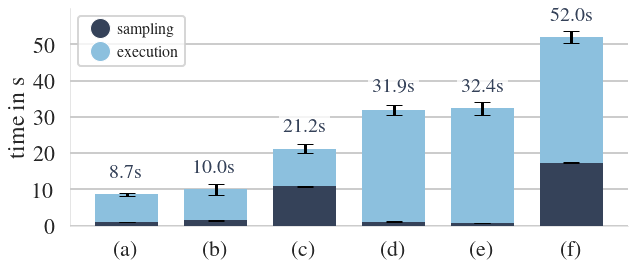

In [247]:
plt.figure(figsize=(10, 4))
w=0.7

sample_col = sns.color_palette()[0]
runtime_col = sns.color_palette()[-1]

n_col = np.array([53, 66, 89]) / 255.0#sns.color_palette()[0]
g_col = np.array([140, 192, 222]) / 255.0 #sns.color_palette()[1]
sample_col = n_col
runtime_col = g_col

plt.bar(np.arange(len(gdf)), gdf[('sampling_time', 'mean')],
        w, color=sample_col,edgecolor='none')
plt.bar(np.arange(len(gdf)), gdf[('job_time_excl_sampling', 'mean')], w, bottom=gdf[('sampling_time', 'mean')],
       color=runtime_col, edgecolor='none')

# plot sampling time on top of bars, b.c. they are so small
vals = gdf[('job_time', 'mean')].values
for x, y, value in zip(x_values, y_values, vals):
    t = plt.text(x, y + 6, '{:.1f}s'.format(value), va='center', fontsize=20, ha='center', color=sample_col)
    t.set_bbox(dict(facecolor='white', alpha=.8, edgecolor='none'))

x_values = np.arange(len(gdf))
y_values = gdf[('sampling_time', 'mean')]
y_error = gdf[('sampling_time', 'std')]
plt.errorbar(x_values, y_values,  yerr=y_error,
             fmt='o', markersize=0, capsize=8, color='k', linewidth=3)

x_values = np.arange(len(gdf))
y_values = gdf[('sampling_time', 'mean')] + gdf[('job_time_excl_sampling', 'mean')]
y_error = gdf[('job_time_excl_sampling', 'std')]
plt.errorbar(x_values, y_values,  yerr=y_error,
             fmt='o', markersize=0, capsize=8, color='k', linewidth=3)

    
plt.ylabel('time in s')
plt.grid(axis='x')
plt.ylim(0, 60)
plt.yticks(np.arange(0, 60, 10))
plt.xticks(np.arange(6), ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)'])

# https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html
hlabels=[('sampling', sample_col), ('execution', runtime_col),]
handles = []
for h in hlabels:
    handles.append(Line2D([0], [0], marker='o', color='w', label=h[0],
                        markerfacecolor=h[1], markersize=20))
plt.legend(handles=handles, fontsize=16, handletextpad=0.05)
sns.despine()
plt.savefig('workshop_sampling.pdf', transparent=True, dpi=120, bbox_inches = 'tight', pad_inches = 0)
print('done')

What's the difference between the two ALL files?

 'SamplingMode.ALL_FILES|FIRST_ROWS': '(i64,i64,i64,str,i64,i64,i64,i64,Option[f64],i64,Option[f64],f64,f64,null,null,null,null,null)'
 
 'SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS': '(Option[i64],Option[i64],i64,str,Option[i64],Option[i64],Option[i64],Option[i64],Option[f64],Option[i64],Option[f64],Option[f64],Option[f64],null,null,null,null,null)'

In [63]:
df

,sampling_mode,job_time,metrics,sampling_time,run,job_time_excl_sampling
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.474317,"{'logical_optimization_time_s': 0.0137463, 'll...",0.775935,4,30.698382
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,29.878893,"{'logical_optimization_time_s': 0.0224654, 'll...",1.150490,4,28.728403
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,8.316061,"{'logical_optimization_time_s': 0.0185247, 'll...",0.964578,4,7.351483
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,10.159707,"{'logical_optimization_time_s': 0.0394885, 'll...",1.418880,4,8.740827
4,SamplingMode.ALL_FILES|FIRST_ROWS,20.294357,"{'logical_optimization_time_s': 0.340269, 'llv...",10.620800,4,9.673557
5,SamplingMode.ALL_FILES|LAST_ROWS|FIRST_ROWS,52.301021,"{'logical_optimization_time_s': 0.60232, 'llvm...",17.458100,4,34.842921
0,SamplingMode.FIRST_FILE|FIRST_ROWS,31.456474,"{'logical_optimization_time_s': 0.0137409, 'll...",0.882812,5,30.573662
1,SamplingMode.FIRST_FILE|LAST_ROWS|FIRST_ROWS,30.659847,"{'logical_optimization_time_s': 0.0223129, 'll...",1.137620,5,29.522227
2,SamplingMode.LAST_FILE|FIRST_FILE|FIRST_ROWS,16.809237,"{'logical_optimization_time_s': 0.0201565, 'll...",0.932661,5,15.876576
3,SamplingMode.LAST_FILE|FIRST_FILE|LAST_ROWS|FI...,10.587621,"{'logical_optimization_time_s': 0.0394833, 'll...",1.456500,5,9.131121


Could sum different paths for hyperspecialization light experiment. -> i.e. show how much planning time makes + parallelism.

Should contrast that with total Lambda execution time (should sum this up somewhere!)